# Node-Level Measures

## Degree Centrality

In [18]:
import zipfile
import os
import networkx as nx

# Define the path to the uploaded ZIP file
#zip_path = "/mnt/data/7647000.zip"
extract_path = r"C:\Users\utente\Documents\GitHub\SNA_25\dataset"


# Extract the ZIP file
#with zipfile.ZipFile(zip_path, 'r') as zip_ref:
#    zip_ref.extractall(extract_path)

# List extracted contents to verify
extracted_files = []
for root, dirs, files in os.walk(extract_path):
    for file in files:
        extracted_files.append(os.path.join(root, file))

extracted_files


['C:\\Users\\utente\\Documents\\GitHub\\SNA_25\\dataset\\Edges_t1.csv',
 'C:\\Users\\utente\\Documents\\GitHub\\SNA_25\\dataset\\Edges_t11_1.csv',
 'C:\\Users\\utente\\Documents\\GitHub\\SNA_25\\dataset\\Edges_t11_10.csv',
 'C:\\Users\\utente\\Documents\\GitHub\\SNA_25\\dataset\\Edges_t11_2.csv',
 'C:\\Users\\utente\\Documents\\GitHub\\SNA_25\\dataset\\Edges_t11_3.csv',
 'C:\\Users\\utente\\Documents\\GitHub\\SNA_25\\dataset\\Edges_t11_4.csv',
 'C:\\Users\\utente\\Documents\\GitHub\\SNA_25\\dataset\\Edges_t11_5.csv',
 'C:\\Users\\utente\\Documents\\GitHub\\SNA_25\\dataset\\Edges_t11_6.csv',
 'C:\\Users\\utente\\Documents\\GitHub\\SNA_25\\dataset\\Edges_t11_7.csv',
 'C:\\Users\\utente\\Documents\\GitHub\\SNA_25\\dataset\\Edges_t11_8.csv',
 'C:\\Users\\utente\\Documents\\GitHub\\SNA_25\\dataset\\Edges_t11_9.csv',
 'C:\\Users\\utente\\Documents\\GitHub\\SNA_25\\dataset\\Edges_t2.csv',
 'C:\\Users\\utente\\Documents\\GitHub\\SNA_25\\dataset\\Edges_t6.csv',
 'C:\\Users\\utente\\Documents\\G

In [19]:
import pandas as pd

# Load all node files and check for missing values
node_files = [f for f in extracted_files if "Nodes" in f]
missing_info_summary = {}

for file in node_files:
    df = pd.read_csv(file)
    missing_counts = df.isnull().sum()
    if missing_counts.any():
        missing_info_summary[file] = missing_counts[missing_counts > 0]

missing_info_summary


{'C:\\Users\\utente\\Documents\\GitHub\\SNA_25\\dataset\\Nodes_t1.csv': prosocial    54
 crttotal     78
 dtype: int64,
 'C:\\Users\\utente\\Documents\\GitHub\\SNA_25\\dataset\\Nodes_t2.csv': prosocial    35
 crttotal     36
 dtype: int64}

In [20]:
# Inspect a sample node file to check column names
sample_node_file = node_files[0]
sample_node_df = pd.read_csv(sample_node_file)
sample_node_df.columns


Index(['Unnamed: 0', 'ID', 'Curso', 'Grupo', 'Sexo', 'prosocial', 'crttotal'], dtype='object')

In [22]:
import os
import pandas as pd
import networkx as nx

extract_path = r"C:\Users\utente\Documents\GitHub\SNA_25\dataset"  # or use "/mnt/data/..." on Linux

in_out_centrality_summary = {}

# Get all edge files in the directory
extracted_files = [
    os.path.join(extract_path, f)
    for f in os.listdir(extract_path)
    if f.startswith("Edges_") and f.endswith(".csv")
]

for edge_file in extracted_files:
    school_id = os.path.basename(edge_file).replace("Edges_", "").replace(".csv", "")
    
    try:
        edge_df = pd.read_csv(edge_file)
        node_file = edge_file.replace("Edges", "Nodes")
        if not os.path.exists(node_file):
            continue
        node_df = pd.read_csv(node_file)

        # Detect ID column
        id_col = None
        for col in node_df.columns:
            if col.lower() == "id":
                id_col = col
                break
        if not id_col:
            continue

        # Ensure required edge columns are present
        if not {'from', 'to', 'weight'}.issubset(edge_df.columns):
            continue

        # Filter positive edges
        positive_edges = edge_df[edge_df['weight'] > 0]

        # Build graph
        G = nx.DiGraph()
        G.add_nodes_from(node_df[id_col])
        G.add_weighted_edges_from(positive_edges[['from', 'to', 'weight']].values)

        # Compute in-degree and out-degree centrality
        in_deg = nx.in_degree_centrality(G)
        out_deg = nx.out_degree_centrality(G)

        # Compute summaries
        top_in = sorted(in_deg.items(), key=lambda x: x[1], reverse=True)[:3]
        top_out = sorted(out_deg.items(), key=lambda x: x[1], reverse=True)[:3]
        mean_in = sum(in_deg.values()) / len(in_deg) if in_deg else 0
        mean_out = sum(out_deg.values()) / len(out_deg) if out_deg else 0

        in_out_centrality_summary[school_id] = {
            "mean_in_degree": mean_in,
            "mean_out_degree": mean_out,
            "top_3_in_degree": top_in,
            "top_3_out_degree": top_out
        }

    except Exception as e:
        in_out_centrality_summary[school_id] = {
            "error": str(e)
        }

in_out_df = pd.DataFrame.from_dict(in_out_centrality_summary, orient='index')
in_out_df


,mean_in_degree,mean_out_degree,top_3_in_degree,top_3_out_degree
t1,0.043758,0.043758,"[(463, 0.11764705882352941), (485, 0.102941176...","[(392, 0.34558823529411764), (558, 0.161764705..."
t11_1,0.047257,0.047257,"[(3499, 0.3448275862068966), (3787, 0.16206896...","[(3676, 0.2655172413793103), (3722, 0.23103448..."
t11_10,0.022922,0.022922,"[(5142, 0.27973568281938327), (5235, 0.0660792...","[(5235, 0.16519823788546256), (5216, 0.1343612..."
t11_2,0.017608,0.017608,"[(4118, 0.218978102189781), (4445, 0.058394160...","[(4360, 0.21751824817518248), (4340, 0.1591240..."
t11_3,0.061697,0.061697,"[(4824, 0.211340206185567), (5043, 0.195876288...","[(4835, 0.25257731958762886), (5059, 0.2319587..."
t11_4,0.076401,0.076401,"[(4921, 0.42857142857142855), (4964, 0.1428571...","[(4943, 0.24369747899159663), (4963, 0.2352941..."
t11_5,0.052995,0.052995,"[(3370, 0.22448979591836737), (3484, 0.1306122...","[(3314, 0.1795918367346939), (3311, 0.17142857..."
t11_6,0.089080,0.089080,"[(2537, 0.2222222222222222), (2538, 0.19444444...","[(2530, 0.40277777777777773), (2615, 0.3611111..."
t11_7,0.091486,0.091486,"[(3059, 0.1844660194174757), (3084, 0.18446601...","[(3043, 0.4077669902912621), (3061, 0.34951456..."
t11_8,0.018021,0.018021,"[(2297, 0.048), (2147, 0.042666666666666665), ...","[(2133, 0.17066666666666666), (2114, 0.1679999..."


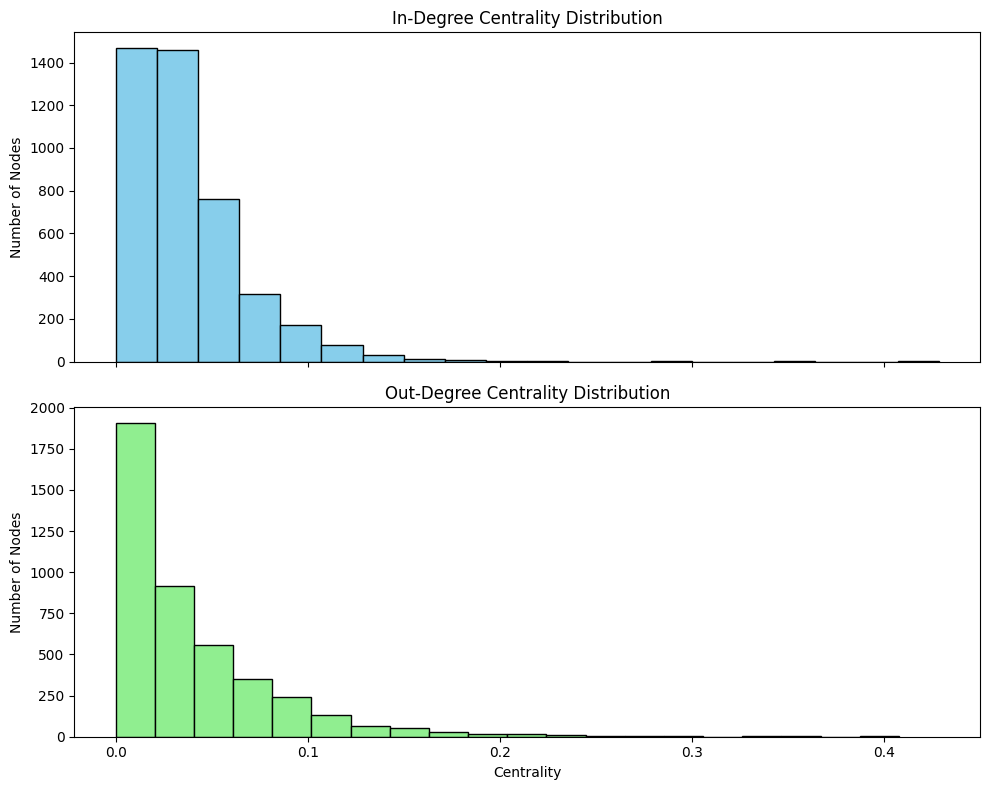

In [24]:
import matplotlib.pyplot as plt

# Gather all in-degree and out-degree values for all schools
all_in_degrees = []
all_out_degrees = []

for school_id in in_out_centrality_summary:
    summary = in_out_centrality_summary[school_id]
    if 'error' in summary:
        continue
    edge_file = [f for f in extracted_files if f"Edges_{school_id}.csv" in f][0]
    edge_df = pd.read_csv(edge_file)
    node_file = edge_file.replace("Edges", "Nodes")
    node_df = pd.read_csv(node_file)

    # Detect ID column
    id_col = None
    for col in node_df.columns:
        if col.lower() == "id":
            id_col = col
            break
    if not id_col and "ID" in node_df.columns:
        id_col = "ID"
    if not id_col:
        continue

    if not {'from', 'to', 'weight'}.issubset(edge_df.columns):
        continue

    # Filter for positive edges
    positive_edges = edge_df[edge_df['weight'] > 0]

    # Build graph
    G = nx.DiGraph()
    G.add_nodes_from(node_df[id_col])
    G.add_weighted_edges_from(positive_edges[['from', 'to', 'weight']].values)

    # Append individual values
    in_deg_values = list(nx.in_degree_centrality(G).values())
    out_deg_values = list(nx.out_degree_centrality(G).values())
    all_in_degrees.extend(in_deg_values)
    all_out_degrees.extend(out_deg_values)

# Plotting
fig, axs = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

axs[0].hist(all_in_degrees, bins=20, color='skyblue', edgecolor='black')
axs[0].set_title("In-Degree Centrality Distribution")
axs[0].set_ylabel("Number of Nodes")

axs[1].hist(all_out_degrees, bins=20, color='lightgreen', edgecolor='black')
axs[1].set_title("Out-Degree Centrality Distribution")
axs[1].set_xlabel("Centrality")
axs[1].set_ylabel("Number of Nodes")

plt.tight_layout()
plt.show()


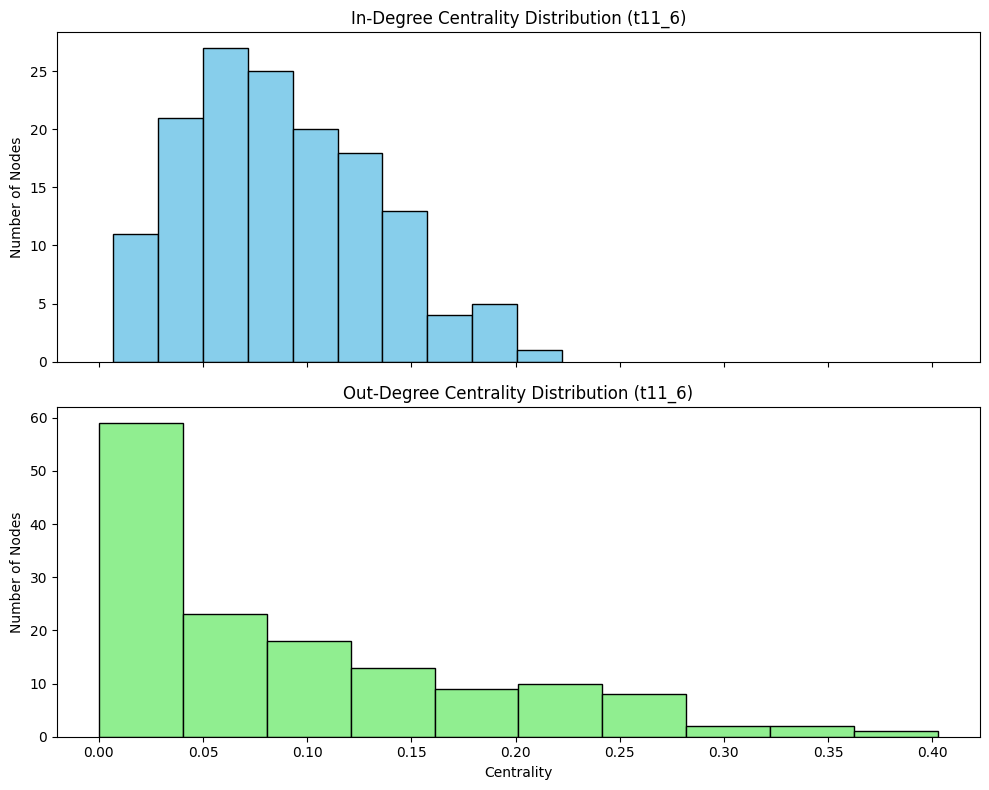

In [25]:
# Locate files for t11_6
edge_file_t116 = [f for f in extracted_files if "Edges_t11_6.csv" in f][0]
node_file_t116 = edge_file_t116.replace("Edges", "Nodes")

# Load data
edge_df = pd.read_csv(edge_file_t116)
node_df = pd.read_csv(node_file_t116)

# Detect ID column
id_col = None
for col in node_df.columns:
    if col.lower() == "id":
        id_col = col
        break
if not id_col and "ID" in node_df.columns:
    id_col = "ID"

# Filter for positive edges
positive_edges = edge_df[edge_df['weight'] > 0]

# Build graph
G = nx.DiGraph()
G.add_nodes_from(node_df[id_col])
G.add_weighted_edges_from(positive_edges[['from', 'to', 'weight']].values)

# Compute centrality values
in_deg_values = list(nx.in_degree_centrality(G).values())
out_deg_values = list(nx.out_degree_centrality(G).values())

# Plot
fig, axs = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

axs[0].hist(in_deg_values, bins=10, color='skyblue', edgecolor='black')
axs[0].set_title("In-Degree Centrality Distribution (t11_6)")
axs[0].set_ylabel("Number of Nodes")

axs[1].hist(out_deg_values, bins=10, color='lightgreen', edgecolor='black')
axs[1].set_title("Out-Degree Centrality Distribution (t11_6)")
axs[1].set_xlabel("Centrality")
axs[1].set_ylabel("Number of Nodes")

plt.tight_layout()
plt.show()


## Betweenness Centrality

In [28]:
# Prepare a summary dictionary for betweenness centrality
betweenness_summary = {}

# Calculate betweenness centrality for each school
for edge_file in extracted_files:
    school_id = edge_file.split("/")[-1].replace("Edges_", "").replace(".csv", "")
    
    try:
        edge_df = pd.read_csv(edge_file)
        node_file = edge_file.replace("Edges", "Nodes")
        if not os.path.exists(node_file):
            continue
        node_df = pd.read_csv(node_file)

        # Detect ID column
        id_col = None
        for col in node_df.columns:
            if col.lower() == "id":
                id_col = col
                break
        if not id_col and "ID" in node_df.columns:
            id_col = "ID"
        if not id_col:
            continue

        if not {'from', 'to', 'weight'}.issubset(edge_df.columns):
            continue

        # Filter for positive edges
        positive_edges = edge_df[edge_df['weight'] > 0]

        # Build graph
        G = nx.DiGraph()
        G.add_nodes_from(node_df[id_col])
        G.add_weighted_edges_from(positive_edges[['from', 'to', 'weight']].values)

        # Compute betweenness centrality
        btw = nx.betweenness_centrality(G, normalized=True)

        # Top 3 by betweenness and general stats
        top_3 = sorted(btw.items(), key=lambda x: x[1], reverse=True)[:3]
        mean_btw = sum(btw.values()) / len(btw) if btw else 0
        max_btw = max(btw.values()) if btw else 0

        betweenness_summary[school_id] = {
            "mean_betweenness": mean_btw,
            "max_betweenness": max_btw,
            "top_3_students": top_3
        }

    except Exception as e:
        betweenness_summary[school_id] = {
            "error": str(e)
        }

btw_df = pd.DataFrame.from_dict(betweenness_summary, orient='index')
btw_df


,mean_betweenness,max_betweenness,top_3_students
C:\Users\utente\Documents\GitHub\SNA_25\dataset\t1,0.004114,0.040994,"[(463, 0.04099419855846387), (392, 0.039491581..."
C:\Users\utente\Documents\GitHub\SNA_25\dataset\t11_1,0.001874,0.024558,"[(3627, 0.024558113739281077), (3551, 0.019835..."
C:\Users\utente\Documents\GitHub\SNA_25\dataset\t11_10,0.000736,0.010645,"[(5235, 0.010644760784522218), (5504, 0.006744..."
C:\Users\utente\Documents\GitHub\SNA_25\dataset\t11_2,0.000416,0.006252,"[(4360, 0.00625166592513387), (4813, 0.0036815..."
C:\Users\utente\Documents\GitHub\SNA_25\dataset\t11_3,0.002740,0.026125,"[(4889, 0.02612544500304657), (4871, 0.0158257..."
C:\Users\utente\Documents\GitHub\SNA_25\dataset\t11_4,0.001731,0.010153,"[(5002, 0.010152823554268378), (4995, 0.009816..."
C:\Users\utente\Documents\GitHub\SNA_25\dataset\t11_5,0.001059,0.007006,"[(3424, 0.00700649849375773), (3368, 0.0059913..."
C:\Users\utente\Documents\GitHub\SNA_25\dataset\t11_6,0.006769,0.044499,"[(2530, 0.04449904821681683), (2539, 0.0409400..."
C:\Users\utente\Documents\GitHub\SNA_25\dataset\t11_7,0.011560,0.106050,"[(3113, 0.10604973078602477), (3132, 0.0884615..."
C:\Users\utente\Documents\GitHub\SNA_25\dataset\t11_8,0.000576,0.006631,"[(2228, 0.006630760145353878), (2250, 0.006620..."


## Closeness Centrality

In [31]:
# Prepare a summary dictionary for closeness centrality
closeness_summary = {}

# Calculate closeness centrality for each school
for edge_file in extracted_files:
    school_id = edge_file.split("/")[-1].replace("Edges_", "").replace(".csv", "")
    
    try:
        edge_df = pd.read_csv(edge_file)
        node_file = edge_file.replace("Edges", "Nodes")
        if not os.path.exists(node_file):
            continue
        node_df = pd.read_csv(node_file)

        # Detect ID column
        id_col = None
        for col in node_df.columns:
            if col.lower() == "id":
                id_col = col
                break
        if not id_col and "ID" in node_df.columns:
            id_col = "ID"
        if not id_col:
            continue

        if not {'from', 'to', 'weight'}.issubset(edge_df.columns):
            continue

        # Filter for positive edges
        positive_edges = edge_df[edge_df['weight'] > 0]

        # Build graph
        G = nx.DiGraph()
        G.add_nodes_from(node_df[id_col])
        G.add_weighted_edges_from(positive_edges[['from', 'to', 'weight']].values)

        # Compute closeness centrality
        close = nx.closeness_centrality(G)

        # Top 3 by closeness and general stats
        top_3 = sorted(close.items(), key=lambda x: x[1], reverse=True)[:3]
        mean_close = sum(close.values()) / len(close) if close else 0
        max_close = max(close.values()) if close else 0

        closeness_summary[school_id] = {
            "mean_closeness": mean_close,
            "max_closeness": max_close,
            "top_3_students": top_3
        }

    except Exception as e:
        closeness_summary[school_id] = {
            "error": str(e)
        }

closeness_df = pd.DataFrame.from_dict(closeness_summary, orient='index')
closeness_df


,mean_closeness,max_closeness,top_3_students
C:\Users\utente\Documents\GitHub\SNA_25\dataset\t1,0.305358,0.384756,"[(463, 0.3847561558118984), (412, 0.3745837957..."
C:\Users\utente\Documents\GitHub\SNA_25\dataset\t11_1,0.158438,0.484173,"[(3499, 0.4841732979664014), (3787, 0.23758455..."
C:\Users\utente\Documents\GitHub\SNA_25\dataset\t11_10,0.080588,0.469660,"[(5142, 0.4696599333834747), (5349, 0.11340536..."
C:\Users\utente\Documents\GitHub\SNA_25\dataset\t11_2,0.070598,0.393236,"[(4118, 0.39323563826823427), (4400, 0.1170044..."
C:\Users\utente\Documents\GitHub\SNA_25\dataset\t11_3,0.168209,0.268681,"[(5043, 0.2686805722049069), (4824, 0.25449189..."
C:\Users\utente\Documents\GitHub\SNA_25\dataset\t11_4,0.122763,0.583862,"[(4921, 0.5838616148213671), (4964, 0.15779645..."
C:\Users\utente\Documents\GitHub\SNA_25\dataset\t11_5,0.107135,0.390593,"[(3370, 0.390593323422084), (3484, 0.152590266..."
C:\Users\utente\Documents\GitHub\SNA_25\dataset\t11_6,0.309919,0.381729,"[(2537, 0.3817285549798503), (2536, 0.37368711..."
C:\Users\utente\Documents\GitHub\SNA_25\dataset\t11_7,0.281807,0.330980,"[(3108, 0.33097969991173876), (3137, 0.3279395..."
C:\Users\utente\Documents\GitHub\SNA_25\dataset\t11_8,0.051153,0.087613,"[(2297, 0.08761253561253561), (2228, 0.0847162..."


## Eigenvector Centrality

In [40]:
import os
import pandas as pd
import networkx as nx

# Set your dataset directory path
extract_path = r"C:\Users\utente\Documents\GitHub\SNA_25\dataset"

# Collect all edge files
extracted_files = [
    os.path.join(extract_path, f)
    for f in os.listdir(extract_path)
    if f.startswith("Edges_") and f.endswith(".csv")
]

# Prepare a summary dictionary for eigenvector centrality
eigenvector_summary = {}

# Calculate eigenvector centrality for each school
for edge_file in extracted_files:
    school_id = os.path.basename(edge_file).replace("Edges_", "").replace(".csv", "")
    
    try:
        edge_df = pd.read_csv(edge_file)
        node_file = edge_file.replace("Edges", "Nodes")
        if not os.path.exists(node_file):
            continue
        node_df = pd.read_csv(node_file)

        # Detect ID column
        id_col = None
        for col in node_df.columns:
            if col.lower() == "id":
                id_col = col
                break
        if not id_col:
            continue

        if not {'from', 'to', 'weight'}.issubset(edge_df.columns):
            continue

        # Filter for positive-weight edges
        positive_edges = edge_df[edge_df['weight'] > 0]

        # Build directed graph
        G = nx.DiGraph()
        G.add_nodes_from(node_df[id_col])
        G.add_weighted_edges_from(positive_edges[['from', 'to', 'weight']].values)

        # Convert to undirected graph for eigenvector centrality (required by NetworkX)
        if not nx.is_connected(G.to_undirected()):
            # Get the largest strongly connected component (as a set of nodes)
            largest_component_nodes = max(nx.strongly_connected_components(G), key=len)
            # Create subgraph from those nodes
            H = G.subgraph(largest_component_nodes).copy()
        else:
            H = G

        # Compute eigenvector centrality
        eig = nx.eigenvector_centrality(H, max_iter=1000)

        # Top 3 by eigenvector centrality and summary stats
        top_3 = sorted(eig.items(), key=lambda x: x[1], reverse=True)[:3]
        mean_eig = sum(eig.values()) / len(eig) if eig else 0
        max_eig = max(eig.values()) if eig else 0

        eigenvector_summary[school_id] = {
            "mean_eigenvector": mean_eig,
            "max_eigenvector": max_eig,
            "top_3_students": top_3
        }

    except Exception as e:
        eigenvector_summary[school_id] = {
            "mean_eigenvector": None,
            "max_eigenvector": None,
            "top_3_students": None,
            "error": str(e)
        }

# Convert summary dictionary to DataFrame
eigenvector_df = pd.DataFrame.from_dict(eigenvector_summary, orient='index')
eigenvector_df


,mean_eigenvector,max_eigenvector,top_3_students
t1,0.040535,0.152674,"[(463, 0.15267367956361158), (495, 0.145327102..."
t11_1,0.034441,0.236777,"[(3787, 0.23677682473540482), (3499, 0.1962151..."
t11_10,0.020956,0.239055,"[(5235, 0.23905450182456786), (5234, 0.2211053..."
t11_2,0.016570,0.180381,"[(4454, 0.18038139986007956), (4445, 0.1791732..."
t11_3,0.083704,0.274340,"[(5131, 0.274340008417419), (5123, 0.248420411..."
t11_4,0.041495,0.292373,"[(4964, 0.29237344538162213), (4961, 0.2848544..."
t11_5,0.116861,0.227620,"[(3369, 0.2276203682263174), (3344, 0.22660227..."
t11_6,0.070194,0.200473,"[(2537, 0.2004730857592621), (2561, 0.18005707..."
t11_7,0.080454,0.250284,"[(3059, 0.25028381495323465), (3068, 0.2383675..."
t11_8,0.103983,0.255747,"[(2228, 0.2557465361268774), (2208, 0.24861378..."


# Network-Level Structure and Cohesion Measures

## Density

In [36]:
# Prepare a summary dictionary for network density
density_summary = {}

# Calculate density for each school
for edge_file in extracted_files:
    school_id = edge_file.split("/")[-1].replace("Edges_", "").replace(".csv", "")
    
    try:
        edge_df = pd.read_csv(edge_file)
        node_file = edge_file.replace("Edges", "Nodes")
        if not os.path.exists(node_file):
            continue
        node_df = pd.read_csv(node_file)

        # Detect ID column
        id_col = None
        for col in node_df.columns:
            if col.lower() == "id":
                id_col = col
                break
        if not id_col and "ID" in node_df.columns:
            id_col = "ID"
        if not id_col:
            continue

        if not {'from', 'to', 'weight'}.issubset(edge_df.columns):
            continue

        # Filter for positive edges only
        positive_edges = edge_df[edge_df['weight'] > 0]

        # Build directed graph
        G = nx.DiGraph()
        G.add_nodes_from(node_df[id_col])
        G.add_weighted_edges_from(positive_edges[['from', 'to', 'weight']].values)

        # Calculate density
        density = nx.density(G)

        # Record number of nodes and edges for context
        density_summary[school_id] = {
            "density": density,
            "num_nodes": G.number_of_nodes(),
            "num_edges": G.number_of_edges()
        }

    except Exception as e:
        density_summary[school_id] = {
            "error": str(e)
        }

density_df = pd.DataFrame.from_dict(density_summary, orient='index')
density_df


,density,num_nodes,num_edges
C:\Users\utente\Documents\GitHub\SNA_25\dataset\t1,0.043758,409,7302
C:\Users\utente\Documents\GitHub\SNA_25\dataset\t11_1,0.047257,291,3988
C:\Users\utente\Documents\GitHub\SNA_25\dataset\t11_10,0.022922,455,4735
C:\Users\utente\Documents\GitHub\SNA_25\dataset\t11_2,0.017608,686,8274
C:\Users\utente\Documents\GitHub\SNA_25\dataset\t11_3,0.061697,195,2334
C:\Users\utente\Documents\GitHub\SNA_25\dataset\t11_4,0.076401,120,1091
C:\Users\utente\Documents\GitHub\SNA_25\dataset\t11_5,0.052995,246,3194
C:\Users\utente\Documents\GitHub\SNA_25\dataset\t11_6,0.089080,145,1860
C:\Users\utente\Documents\GitHub\SNA_25\dataset\t11_7,0.091486,104,980
C:\Users\utente\Documents\GitHub\SNA_25\dataset\t11_8,0.018021,376,2541


## Average Path Length

In [38]:
# Prepare a summary dictionary for average path length
apl_summary = {}

# Calculate average path length for each school
for edge_file in extracted_files:
    school_id = edge_file.split("/")[-1].replace("Edges_", "").replace(".csv", "")
    
    try:
        edge_df = pd.read_csv(edge_file)
        node_file = edge_file.replace("Edges", "Nodes")
        if not os.path.exists(node_file):
            continue
        node_df = pd.read_csv(node_file)

        # Detect ID column
        id_col = None
        for col in node_df.columns:
            if col.lower() == "id":
                id_col = col
                break
        if not id_col and "ID" in node_df.columns:
            id_col = "ID"
        if not id_col:
            continue

        if not {'from', 'to', 'weight'}.issubset(edge_df.columns):
            continue

        # Filter for positive edges
        positive_edges = edge_df[edge_df['weight'] > 0]

        # Build directed graph
        G = nx.DiGraph()
        G.add_nodes_from(node_df[id_col])
        G.add_weighted_edges_from(positive_edges[['from', 'to', 'weight']].values)

        # Get the largest strongly connected component to ensure path length is defined
        if not nx.is_strongly_connected(G):
            largest_scc = max(nx.strongly_connected_components(G), key=len)
            H = G.subgraph(largest_scc).copy()
        else:
            H = G

        # Calculate average shortest path length
        apl = nx.average_shortest_path_length(H)

        # Record size of the component analyzed
        apl_summary[school_id] = {
            "average_path_length": apl,
            "num_nodes_in_component": H.number_of_nodes()
        }

    except Exception as e:
        apl_summary[school_id] = {
            "error": str(e)
        }

apl_df = pd.DataFrame.from_dict(apl_summary, orient='index')
apl_df


,average_path_length,num_nodes_in_component
C:\Users\utente\Documents\GitHub\SNA_25\dataset\t1,2.890970,360
C:\Users\utente\Documents\GitHub\SNA_25\dataset\t11_1,2.381336,121
C:\Users\utente\Documents\GitHub\SNA_25\dataset\t11_10,2.418277,97
C:\Users\utente\Documents\GitHub\SNA_25\dataset\t11_2,2.285326,149
C:\Users\utente\Documents\GitHub\SNA_25\dataset\t11_3,2.311574,81
C:\Users\utente\Documents\GitHub\SNA_25\dataset\t11_4,1.923280,28
C:\Users\utente\Documents\GitHub\SNA_25\dataset\t11_5,1.957335,59
C:\Users\utente\Documents\GitHub\SNA_25\dataset\t11_6,2.352502,104
C:\Users\utente\Documents\GitHub\SNA_25\dataset\t11_7,2.585789,76
C:\Users\utente\Documents\GitHub\SNA_25\dataset\t11_8,2.643113,63
